# part5  데이터 사전 처리

In [1]:
# 1. 누락 데이터 처리
import seaborn as sns

df = sns.load_dataset('titanic')

In [ ]:
df.info()  # deck 컬럼의 누락값이 많은 것을 확인

In [ ]:
# deck 컬럼의 전체 개수와 유효한 자료의 개수
df['deck'].value_counts()  # 유효한 자료의 개수
df['deck'].value_counts(dropna=False)   # 누락된 자료의 개수도 확인 -> Nan이 688개인 것을 확인

In [ ]:
# 누락 데이터가 있는지 확인 : df.isnull()  -> True, False
#                                notnull()  -> 유효한 자료가 있으면 True, 
print(df.head().isnull())
print()
print(df.head().notnull())

In [ ]:
# isnull() 메소드로 누락 데이터 개수 확인
print(df.isnull().sum(axis=0))

# age, deck 컬럼이 누락 데이터가 있다고 확인

In [ ]:
# 누락 데이터 제거 : df.dropna(axis=1, thresh=500)
df_1 = df.dropna(axis=1, thresh=500)   # Nan 데이터 개수가 500개보다 많은 컬럼 삭제 -> deck 컬럼 삭제 됨
df_1.isnull().sum()

In [ ]:
# 누락 데이터 치환 : df[컬럼].fillna( method = bfill or ffill , value, inplace=)
# age 컬럼이 Nan 데이터 포함 -> Nan을 age의 평균으로 치환
print(df['age'].head(10))   # 5 인덱스에 Nan 값

# age의 평균값을 Nan에 치환
df['age'].fillna(df['age'].mean(axis=0), inplace=True)
print(df['age'].head(10))

In [ ]:
df.dropna(axis=1, thresh=500, inplace=True)
df.isnull().sum()

In [ ]:
# embark_town 컬럼 확인 -> 825:830
print(df['embark_town'][825:831])

# embark_town의 Nan은 가장 많이 나오는 값으로 치환
print(df['embark_town'].value_counts().max())     # 가장 큰 값 반환
print(df['embark_town'].value_counts().idxmax())  # 가장 큰 값의 인덱스 반환
df_1 = df.copy()
df_1['embark_town'].fillna(df['embark_town'].value_counts().idxmax(), inplace=True)
df_1['embark_town'][825:830]

In [26]:
# embark_town의 Nan 값을 이전에 나오는 값으로 대체
df_2 = df.copy()
print(df_2['embark_town'][825:830])
df_2['embark_town'].fillna(method='ffill', inplace=True)
print(df_2['embark_town'][825:830])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object
825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
Name: embark_town, dtype: object


In [ ]:
df['embark_town'].fillna(method='bfill')[825:831]

In [29]:
# 2. 중복 데이터 처리
import pandas as pd


In [ ]:
df = pd.DataFrame({'c1':['a','a','b','a', 'b'],
                  'c2':[1,1,1,2,2],
                  'c3': [1,1,2,2,2]})
print(df)

# 전체 데이터 중복값 찾기
df_dup = df.duplicated()  # 중복이면 True 반환
print(df_dup)

# 특정 컬럼에 대해 중복값 찾기
col_dup = df['c1'].duplicated()
print(col_dup)

In [ ]:
# 중복행 제거 : drop_duplicates()
print(df)

df2 = df.drop_duplicates()
print(df2)

# 중복행 제거 : 특정 컬럼 기준으로 
df3 = df.drop_duplicates(subset=['c2', 'c3'], keep='last')  # 마지막에 나오는 중복값 유지
print(df3)

In [46]:
#  3. 데이터 표준환 
# 3-1. 단위 환산 : mpg -> kpl
df = pd.read_csv('./data/auto-mpg.csv', header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
#  단위를 환산한 'kpl' 컬럼 추가
df['kpl'] = (df['mpg'] * (1.60934 / 3.78541)).round(2)
df.head()

In [ ]:
df_1 = df.iloc[:, 1:]
df_1.head()

In [55]:
# 3-2 자료형 변환 
# 추가된 kpl 컬럼 제거
# df.drop('kpl',axis=1, inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
# model year의 자료 타입 확인 
print(df['horsepower'].dtype)  # object -> float 으로 변환
# df['horsepower'].map(float)  # 변환 안됨 -> '?'
df['horsepower'].unique()    # 해당 값의 중복을 제거하고 리스트 반환 -> '?'

In [61]:
import numpy as np

In [ ]:
# df['horsepower'] -> 실수로 변환 할려고 함 : '?' 발견
# 1. '?' 를 Nan으로 대체 -> replace(이전갑, 대체할 값), 2.Nan 처리  
df['horsepower'].replace('?', np.nan, inplace=True)   #  '?' -> nan 으로 대체
print('?' in df['horsepower'].unique() )  # '?'가 없는 것을 확인

df.dropna(subset=['horsepower'], axis=0, inplace=True)  #  누락 데이터 행을 삭제
print(df['horsepower'].isnull().sum())  # 누락 데이터 여부 확인

In [71]:
# df['horsepower']=df['horsepower'].map(float)
df['horsepower']=df['horsepower'].astype('float')
print(df['horsepower'].dtype)

float64


In [ ]:
# 'origin'  컬럼의 unique()
print(df['origin'].unique())

# 'origin' 컬럼의 값이 1:USA, 2: EU, 3:JPN으로 대체
df['origin'].replace({1:'USA', 2: 'EU', 3:'JPN'}, inplace=True)
print(df['origin'].unique())

In [ ]:
# 'origin'의 데이터 타입
print(df['origin'].dtype)   # object type -> category type(범주형)으로 변경
df['origin'] = df['origin'].astype('category')
print(df['origin'].dtype) 

#  범주형을 문자형으로 변경
df['origin'] = df['origin'].astype('str')
print(df['origin'].dtype) 

In [ ]:
print(df['model year'].dtype)
print(df['model year'].sample(5)) 

# int형을 범주형으로 변환
df['model year'] = df['model year'].astype('category')
print(df['model year'].dtype)
print(df['model year'].unique())

In [ ]:
# 데이터 전처리 
# 1. 누락 데이터 처리
# 2. 단위 환산
# 3. 치환 후 누락 데이터 처리,  다른 값으로 대체
# 4. 데이터 타입을 변환 시킴

In [83]:
# 4. 범주형 데이터 처리
# auto-mpg.csv 파일을 읽어서 , 컬럼명 지정
df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns =['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

In [84]:
# 1. 누락 테이터 처리 : 데이터 갯수의 절반 이상이면 해당 컬럼을 삭제
df.info()  #  누락 데이터 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
# 2. 데이터 타입 변경 -> horsepower 컬럼을 float 형으로 데이터 타입 변환
# df['horsepower'] = df['horsepower'].astype('float')
# horsepower 의 값을 확인
df['horsepower'].unique()   # '?'
# '?' 있는 행을 처리 -> Nan
df['horsepower'].replace('?',np.nan, inplace=True)
df['horsepower']

In [ ]:
# '?' in df['horsepower'].unique()  
df['horsepower'] = df['horsepower'].astype('float')

df.info()
df.head()

In [93]:
# Nan 자료를 삭제, 행을 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64


In [99]:
# horsepower 컬럼을 범주형으로 
# np.historgram()  -> 구간의 갯수를 입력하면 각 구간별 개수와 경계값 반환
count, bin_values = np.histogram(df['horsepower'], bins=3)
print(count, bin_values)

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]


In [ ]:
# 구간별 이름 : [ '저출력', '보통출력', '고출력']
bin_names = [ '저출력', '보통출력', '고출력']

# pd.cut() -> 각 데이터를 3개의 bin에 할당
print(df.head())
df['hp_bin'] = pd.cut(x = df['horsepower'],   # bin을 처리할 데이터
                      bins = bin_values,      # bin의 경계값 리스트
                      labels=bin_names,       # 각 경계의 이름
                      include_lowest=True     # 최저값 포함 여부
                     )
print(df[['horsepower','hp_bin']].head(15))
print(count, bin_values)

In [123]:
# titanic 자료를 읽어 titanic에 저장한 후
titanic = sns.load_dataset('titanic')
titanic.head()

titanic.info()  # deck, age -> Nan data 포함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [112]:
print(titanic['deck'].value_counts(dropna=False))
print(titanic['age'].value_counts(dropna=False))
titanic.columns

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: age, Length: 89, dtype: int64


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [124]:
titanic.dropna(axis=1, thresh=len(titanic)//2, inplace=True)
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [125]:
# age 컬럼의 Nan은 평균값으로 대체
titanic['age'].fillna(round(titanic['age'].mean()), inplace=True)
titanic['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    30.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [ ]:
# age 컬럼을 다음과 같이 구간 분리 -> age_gubun 컬럼을 titanic 에 추가 

bins = [0, 15, 25, 35, 60, 99] 
labels = ["미성년자", "청년", "중년", "장년", "노년"]

titanic['age_bin'] = pd.cut(x=titanic['age'],
                           bins = bins,
                           labels= labels,
                           include_lowest=True)
titanic.head()

In [ ]:
df['hp_bin']  #더미변수로 변환, one-hot-encoding
pd.get_dummies(df['hp_bin'])

In [ ]:
# 1. 누락 데이터 처리
# 2. 대체 데이터 저리
# 3. 중복 데이터 처리
# 4. 데이터 타입 변경
# 5. 숫자형, 문자형, 범주형으로 변경
# 6. 문자형과 범주형은 dummy 변수로 변환

In [ ]:
from sklearn import preprocessing  # sklearn의 전처리 모듈 import

# 전처리를 위한 encoder 객체 만들기
label_encoder = preprocessing.LabelEncoder()    #  라벨 object 생성
onehot_encoder = preprocessing.OneHotEncoder()  # one hot encoder object 생성

# label encoder로 문자('저출렬', '보통출력','고출력')를 숫자형(0,1,2) 범주로 변환
onehot_labeled = label_encoder.fit_transform(df['hp_bin'])  
onehot_labeled

# 2차원 배열로 변경
onehot_reshaped = onehot_labeled.reshape(len(onehot_labeled),1)
onehot_reshaped

# 희소행렬로 변환
onehot_fitted = onehot_encoder.fit_transform(onehot_reshaped)
onehot_fitted

In [ ]:
# 5 정규화

In [ ]:
# 6. 시계열 데이터
# 문자형 날짜를 datetime 형으로 변경
df = pd.read_csv('./data/stock-data.csv')
print(df.head())
df.info()  # Date 의 자료형이 object 를 datetime 으로 변경 -: pd.to_datetime(자료)

In [ ]:
df['new_Date'] = pd.to_datetime(df['Date'])
df.info()

In [ ]:
# Date  컬럼을 삭제 -> new_Date컬럼을 인덱스로
df.drop('Date', axis=1, inplace=True)
df.head()

In [141]:
# new_Date컬럼을 인덱스로
# df.set_index('new_Date', inplace=True)
df.head()


,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [ ]:
df[['Close', 'Start']].plot()

In [ ]:
# Timestamp를 period로 변환
dates = [ '2019-01-01', '2020-03-01', '2021-06-01']

to_dates = pd.to_datetime(dates)
print(to_dates)

# Timestamp를 period로 변환
pr_day = to_dates.to_period(freq='D')
print(pr_day)
pr_month = to_dates.to_period(freq='M')
print(pr_month)
pr_year = to_dates.to_period(freq='A')
print(pr_year)

In [148]:
# 날짜를 분리 -> 년 , 월, 일로
df = pd.read_csv('./data/stock-data.csv')
df['new_Date'] = pd.to_datetime(df['Date'])
df.head(3)

,Date,Close,Start,High,Low,Volume,new_Date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28


In [ ]:
df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day
df.head(3)

In [ ]:
df.info()

In [150]:
# 데이터 전처리 
# 1. 누락 데이터 처리
# 2. 데이터 타입 변경, 단위 변환,..
# 3. 데이터 정규화
# 4. 시계열 데이터 (?) 처리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
 7   Year      20 non-null     int64         
 8   Month     20 non-null     int64         
 9   Day       20 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 1.7+ KB


In [151]:
# 시도별 전출입 인구수 자료에 대한 전처리
df_sido = pd.read_excel('./data/시도별 전출입 인구수.xlsx')
df_sido.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [ ]:
# Nan 데이터 처리
print(df_sido.isnull().sum())      # 전출지별    306개 발견
df_sido['전출지별'].fillna(method='ffill', inplace=True)
print(df_sido.isnull().sum())    # 해결

In [166]:
df_sido.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [ ]:
print(df_sido.dtypes.head())   
# 처음 행 제거
df_sido.drop(0, axis=0, inplace=True)

In [168]:
# 값에 '-' 를 0으로 대체
df_sido.replace('-', '0', inplace=True)
df_sido.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,0,0,0,0,0,0,0,0,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,0,0,0,0,0,0,0,0,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465


In [169]:
# 인구수를 int로 형변환
df_sido[df_sido.columns[3:]] = df_sido[df_sido.columns[3:]].astype(int)

In [185]:
df_sido[df_sido.columns[3:]].dtypes  # int 로 변환됨

1971    int32
1972    int32
1973    int32
1974    int32
1975    int32
1976    int32
1977    int32
1978    int32
1979    int32
1980    int32
1981    int32
1982    int32
1983    int32
1984    int32
1985    int32
1986    int32
1987    int32
1988    int32
1989    int32
1990    int32
1991    int32
1992    int32
1993    int32
1994    int32
1995    int32
1996    int32
1997    int32
1998    int32
1999    int32
2000    int32
2001    int32
2002    int32
2003    int32
2004    int32
2005    int32
2006    int32
2007    int32
2008    int32
2009    int32
2010    int32
2011    int32
2012    int32
2013    int32
2014    int32
2015    int32
2016    int32
2017    int32
dtype: object

In [186]:
# 전출지별 -> 전출지, 전입지별 -> 전입지로 변경
df_sido.rename(columns={'전출지별':'전출지', '전입지별':'전입지'}, inplace=True)
df_sido.head()

,전출지,전입지,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,0,0,0,0,0,0,0,0,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,0,0,0,0,0,0,0,0,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465


In [187]:
# 전출지와 전입지의 값이 같은 행 삭제
df_1 = df_sido[df_sido['전출지'] != df_sido['전입지']]
df_1.head()

,전출지,전입지,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,0,0,0,0,0,0,0,0,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,0,0,0,0,0,0,0,0,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
6,전국,광주광역시,0,0,0,0,0,0,0,0,...,268757,293879,268574,260561,228612,226696,243066,224603,213176,208138


In [188]:
# 전출지가 서울이고 전입지가 서울이 아닌 자료 추출
df_seoul = df_1[(df_1['전출지']=='서울특별시') & (df_1['전입지']!='서울특별시')]
df_seoul

,전출지,전입지,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,0,0,0,0,0,0,0,0,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,0,0,0,0,0,0,0,0,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,0,0,0,0,0,0,0,0,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,서울특별시,대전광역시,0,0,0,0,0,0,0,0,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,서울특별시,울산광역시,0,0,0,0,0,0,0,0,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,서울특별시,세종특별자치시,0,0,0,0,0,0,0,0,...,0,0,0,0,2998,2851,6481,7550,5943,5813
28,서울특별시,경기도,130149,150313,93333,143234,149045,253705,202276,207722,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,서울특별시,강원도,9352,12885,13561,16481,15479,27837,25927,25415,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [189]:
# 전출지 컬럼 삭제
df_seoul.drop('전출지', axis=1, inplace=True)

C:\Users\YGL\AppData\Local\Temp\ipykernel_9940\3424474125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop('전출지', axis=1, inplace=True)


In [181]:
df_seoul

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,0,0,0,0,0,0,0,0,0,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,0,0,0,0,0,0,0,0,0,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,0,0,0,0,0,0,0,0,0,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,0,0,0,0,0,0,0,0,0,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,0,0,0,0,0,0,0,0,0,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [190]:
df_seoul = df_seoul[df_seoul['전입지']!='전국']
df_seoul

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,0,0,0,0,0,0,0,0,0,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,0,0,0,0,0,0,0,0,0,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,0,0,0,0,0,0,0,0,0,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,0,0,0,0,0,0,0,0,0,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,0,0,0,0,0,0,0,0,0,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
30,충청북도,6700,9457,10853,12617,11786,21073,18029,17478,18420,...,15294,15295,15461,15318,14555,13783,14244,14379,14087,13302


In [191]:
df_seoul.set_index('전입지', inplace=True)  # 전입지로 인덱스 설정 

In [ ]:
df_T = df_seoul.T
df_T

In [ ]:
df_columns = df_T.columns
print(df_columns)

In [198]:
sido_names = [df_columns[0] ,*list(df_columns[7:])]
sido_names

Index(['부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도',
       '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'],
      dtype='object', name='전입지')


['부산광역시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [ ]:
df_2 = df_T.loc[:, sido_names]
df_2

In [202]:
# %load matplot.py
import matplotlib.pyplot as plt

plt.rc('font', family='gulim') # For Windows
plt.rc('axes', unicode_minus=False)


<AxesSubplot:>

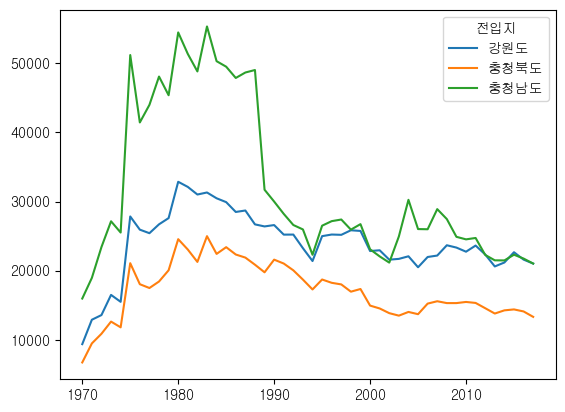

In [207]:
df_2.iloc[:, 2:5].plot()